## gym-zmeyka

only one snake and no parameters yet

```actions:
* 0 - Turn left
* 1 - Turn right
* 2 - Do nothing (keep going forward)

observation = [ pixels:list[list] , [A,B,C,D,E] ]
* A - pixel to in front of the snake's head
* B - pixel to the left of the snake's head
* C - pixel to the right of the snake's head
* D - is the food to the left (-1), to the right (1) or in front (0) of the snake's head?
* E - direction of the snake = [left, right, up, down].index(E)  

pixels:

* 0 - free space
* 1 - snake and borders
* 2 - food
```



have fun!

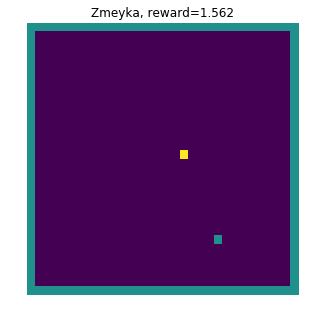

In [ ]:
# some baseline learning

import gym
import gym_zmeyka
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
import itertools
from sklearn import neural_network, neighbors
import random

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (5,5)

env = gym.make('zmeyka-v0')
last_reward = 200
last_obs = []

make_random = True

clf = neighbors.KNeighborsClassifier(1)

X, y = [], []

for i in range(100):
    env.reset()
    while(True):
        env.render()
        if not make_random:
            improper_action = clf.predict([last_obs])
            predicted_action = random.choice([i for i in [0,1,2] if i!=improper_action])
        else:
            if random.random() > 0.8:
                predicted_action = 2
            else:
                predicted_action = random.choice([0,1])         
        current_obs, current_reward, done, info = env.step(predicted_action)
        if current_reward < last_reward and len(last_obs)>0:
            X.append(last_obs)
            y.append(predicted_action) 
            clf.fit(X,y)
            make_random = False
        else:
            make_random = True
        last_obs = current_obs[1]
        last_reward = current_reward
        if done: break